<a href="https://colab.research.google.com/github/brnnwon/Miniproject/blob/main/Placement%20data/Placement_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Recruitment

Dataset ชุดนี้เป็นข้อมูลการจ้างงานของสถาบันการศึกษาแห่งหนึ่ง ซี่งมีข้อมูลการศึกษาของผู้สมัคร ความเชี่ยวชาญ ประสบการณ์การทำงาน ผลการสอบเข้าทำงาน และผลการรับเข้าทำงาน (status)

## Data Description

| Variables | Definition |
| --------- | ---------- |
| sl_no | Serial Number |
| gender | Gender- Male='M',Female='F' |
| ssc_p | Secondary Education percentage- 10th Grade |
| ssc_b | Board of Education (Secondary Education)- Central/ Others |
| hsc_p | Higher Secondary Education percentage- 12th Grade |
| hsc_b | Board of Education (Higher Secondary Education)- Central/ Others |
| hsc_s | Specialization in Higher Secondary Education |
| degree_p | Degree Percentage |
| degree_t | Under Graduation(Degree type)- Field of degree education |
| workex | Work Experience |
| etest_p | Employability test percentage (conducted by college) |
| specialisation | Post Graduation(MBA)- Specialization |
| mba_p | MBA percentage |
| status | Status of placement- Placed/Not placed |

## Objective:

- Explore data และ สร้าง classification model เพื่อทำนายผลการรับเข้าทำงาน (status)
- ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน (3 อันดับแรก)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/placement.csv')

##**Data Overview**

**ทำการตรวจสอบ Data**

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


**ทำการ Drop column sl_no เนื่องจากเป็น id ที่ไม่มีผลกับการทำนายของโมเดล**

In [ ]:
data.drop("sl_no", axis=1, inplace=True)

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


**ทำการตรวจสอบว่าในแต่ละแถวมีข้อมูลที่เป็นค่าอะไรบ้าง ที่ไม่ซ้ำกัน**

In [ ]:
#Display categorical data
print(data['gender'].unique())
print(data['hsc_b'].unique())
print(data['hsc_s'].unique())
print(data['degree_t'].unique())
print(data['specialisation'].unique())

['M' 'F']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']


**ทำการตรวจสอบ type ของข้อมูลในแต่ละ column**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


**ทำการตรวจสอบค่าทางสถิติต่างๆ ของข้อมูล**

In [ ]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [ ]:
data.shape

(215, 13)

**ทำการตรวจสอบว่าข้อมูลมีค่า null อยู่หรือไม่**

In [ ]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

#### Remove outlier

**ทำการตรวจสอบ outlier ของข้อมูลแต่ละ column โดยแสดงออกมาเป็น boxplot**

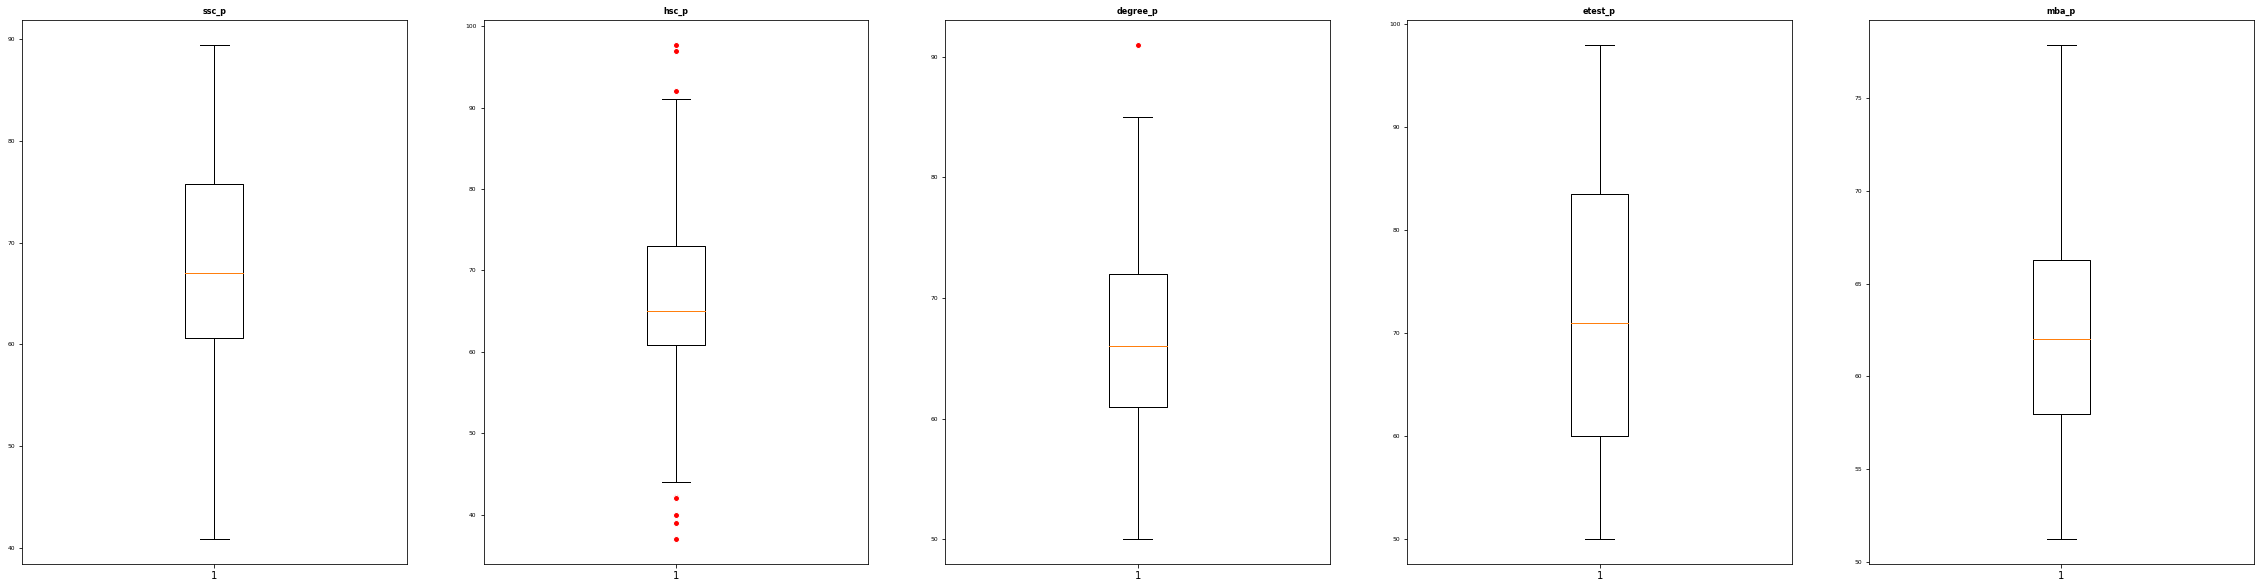

(215, 13)


In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(data.select_dtypes(['int', 'float']).columns), figsize=(40,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(data.select_dtypes(['int', 'float']).iloc[:,i], flierprops = red_circle)
    data.select_dtypes(['int', 'float']).iloc[:,i]
    ax.set_title(data.select_dtypes(['int', 'float']).columns[i], fontsize = 8, fontweight = 'bold')
    ax.tick_params(axis='y', labelsize = 6)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if data.select_dtypes(['int', 'float']).columns[i] == 'RDEP' or data.select_dtypes(['int', 'float']).columns[i] == 'RMED':
        ax.semilogy()

plt.show()
print(data.shape)

**จากกราฟด้านบนจะเห็นว่ามี outlier อยู่ใน column hsc_p และ degree_p จึงทำการ remove ข้อมูลที่เป็น outlier ออก**

In [ ]:
# Remove outlier in each columns
for col in data.select_dtypes(['int', 'float']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outlier = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    data.drop(outlier.index, axis = 0, inplace = True)

**ทำการพลอต boxplot หลักจาก remove outlier เพื่อตรวจสอบอีกครั้ง พบว่าไม่มี outlier แล้ว**

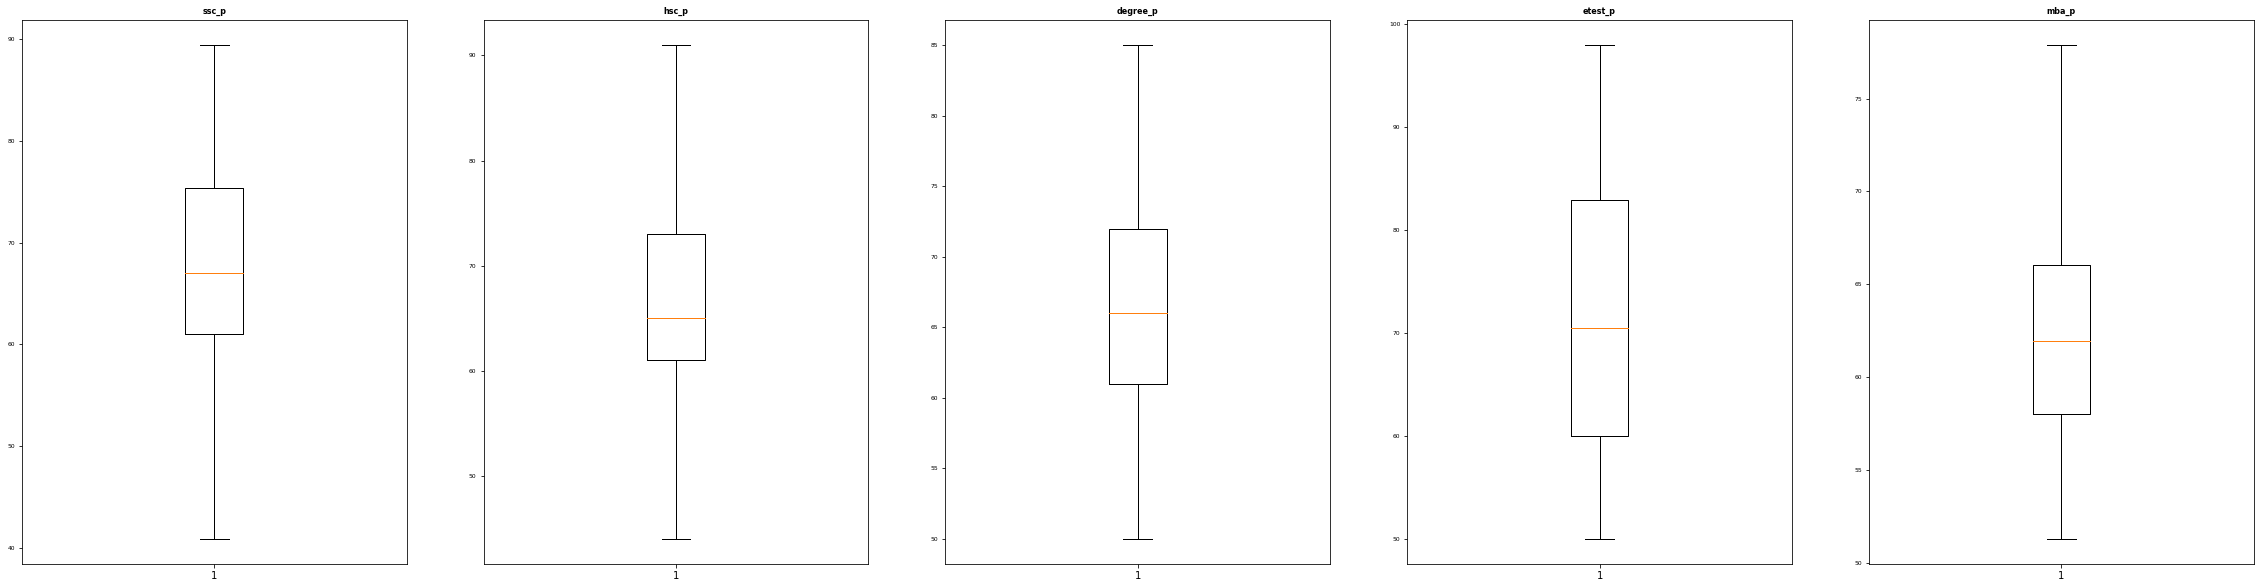

(206, 13)


In [ ]:
# Plotting boxplot after remove the outlier
# Defined color to outlier (Ref: https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4)
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(data.select_dtypes(['int', 'float']).columns), figsize=(40,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(data.select_dtypes(['int', 'float']).iloc[:,i], flierprops = red_circle)
    data.select_dtypes(['int', 'float']).iloc[:,i]
    ax.set_title(data.select_dtypes(['int', 'float']).columns[i], fontsize = 8, fontweight = 'bold')
    ax.tick_params(axis='y', labelsize = 6)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if data.select_dtypes(['int', 'float']).columns[i] == 'RDEP' or data.select_dtypes(['int', 'float']).columns[i] == 'RMED':
        ax.semilogy()

plt.show()
print(data.shape)

In [ ]:
data.shape

(206, 13)

##**Data Visualization**

**ทำการ visualize ข้อมูล โดยการพลอต bar chart ที่แสดงการถูกจ้าง (Placed) และไม่ถูกจ้าง (Not placed) ของ feature แต่ละ column**

In [ ]:
data.groupby('status')['gender'].value_counts()

status      gender
Not Placed  M         35
            F         27
Placed      M         99
            F         45
Name: gender, dtype: int64

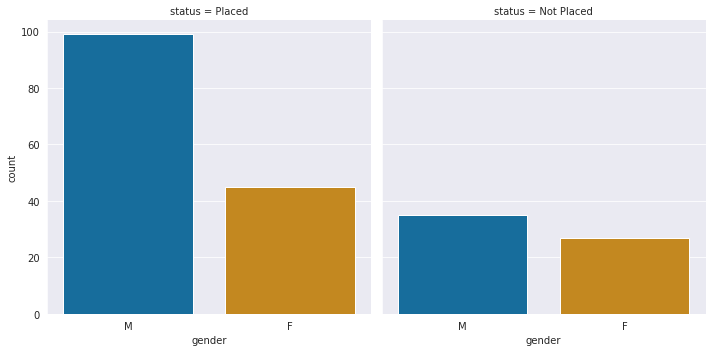

In [ ]:
#Gender
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.catplot(x = 'gender', col = 'status',data = data, kind = 'count')
plt.show()

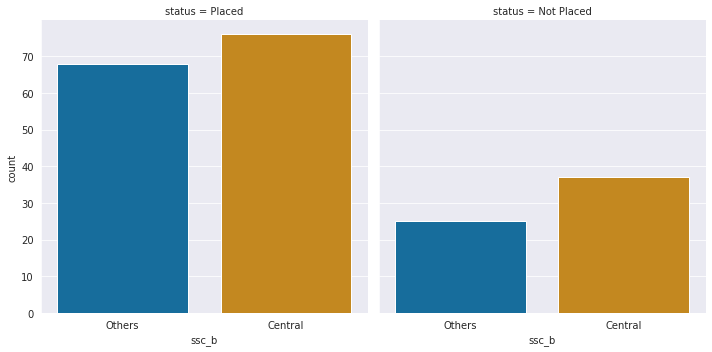

In [ ]:
# Secondary Education percentage- 10th Grade
sns.catplot(x = 'ssc_b', col = 'status',data = data, kind = 'count')
plt.show()

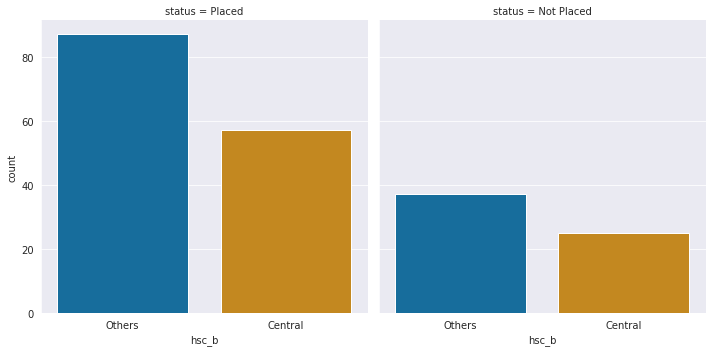

In [ ]:
#Board of Education (Higher Secondary Education)
sns.catplot(x = 'hsc_b', col = 'status',data = data, kind = 'count')
plt.show()

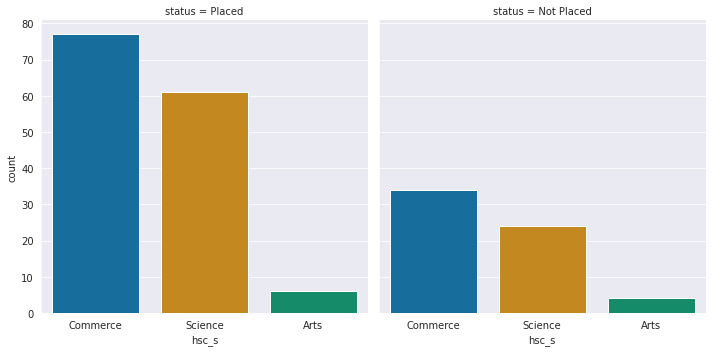

In [ ]:
#Specialization in Higher Secondary Education
sns.catplot(x = 'hsc_s', col = 'status',data = data, kind = 'count')
plt.show()

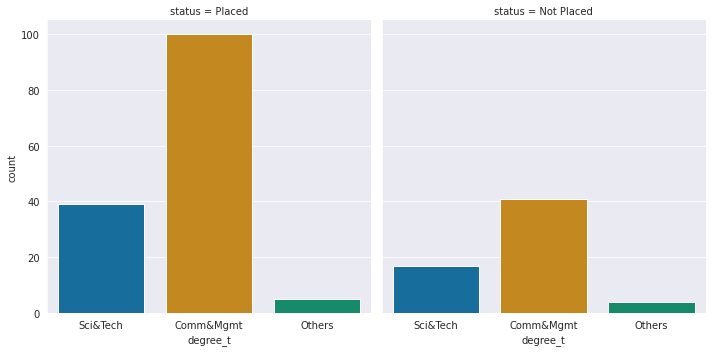

In [ ]:
#Under Graduation(Degree type)
sns.catplot(x = 'degree_t', col = 'status',data = data, kind = 'count')
plt.show()

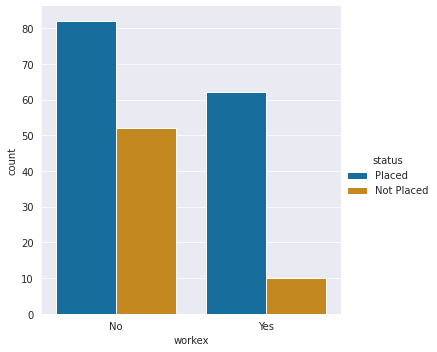

In [ ]:
#Work experience
sns.catplot(x = 'workex', hue = 'status',data = data, kind = 'count')
plt.show()

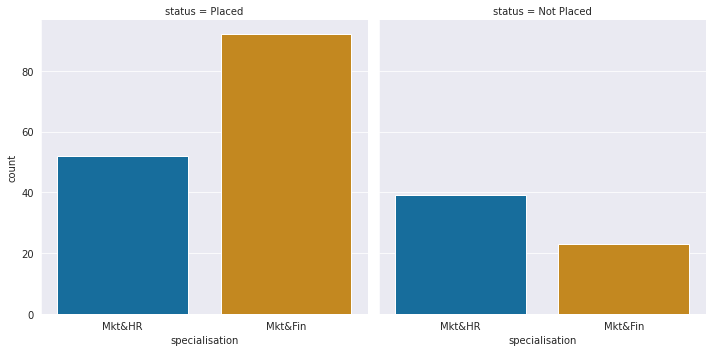

In [ ]:
sns.catplot(x = 'specialisation', col = 'status',data = data, kind = 'count')
plt.show()

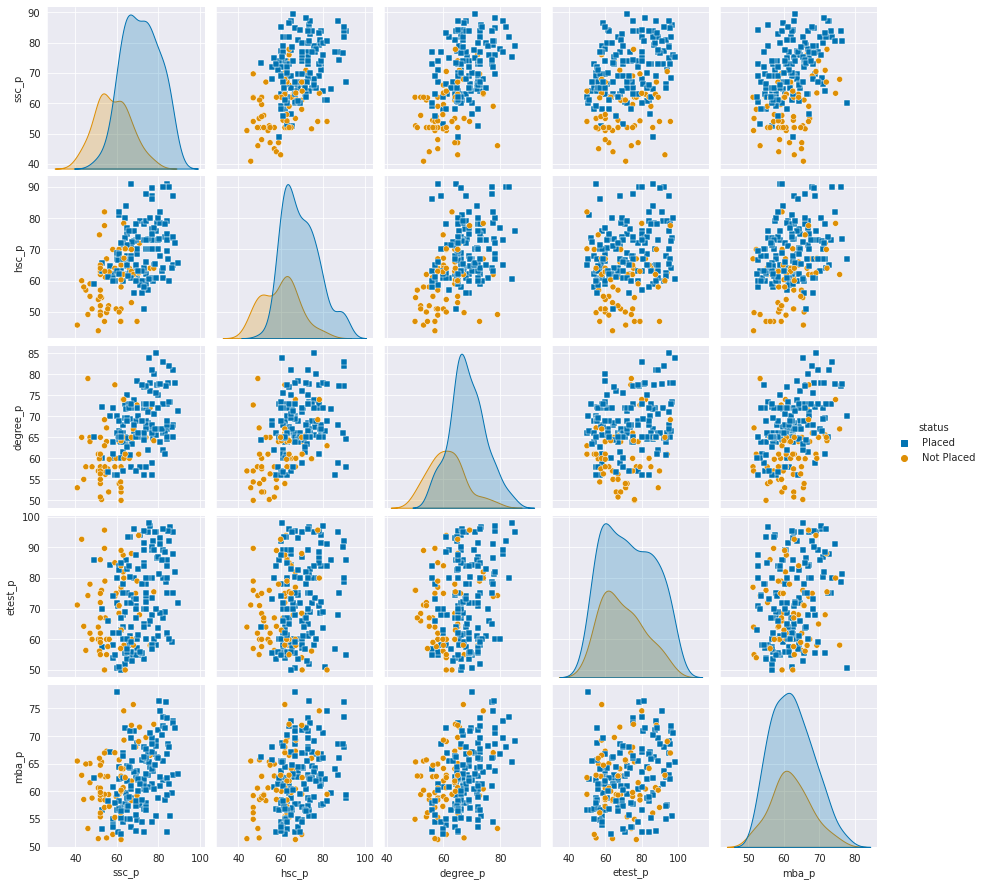

In [ ]:
sns.pairplot(data = data, kind="scatter", hue="status", markers=["s", "o"])
plt.show()

**จากการทำ Data Visualization โดยเปรียบเทียบกับการจ้างงานสามารถสรุปได้ดังนี้**


* gender (เพศ) - เพศชายได้รับการจ้างงานมากกว่าเพศหญิง
* คนที่จบมาทางด้าน Commerce ในระดับชั้นมัธยม ได้รับการจ้างงานมากกว่าคนที่จบมาทางด้านวิทยาศาสตร์และศิลปะ
* คนที่จบปริญญาตรีทางด้านการจัดการได้รับการจ้างงานมากกว่าสาขาอื่นๆ
* ประสบการณ์ทำงานได้รับการจ้างงานมากกว่าคนที่ไม่มีประสบการณ์ทำงาน
* คนที่จบปริญญาโททางด้านการตลาดและการเงินมีได้รับการจ้างงานมากกว่าทางด้านการตลาดและ HR

**หากดูจากการ plot ความสัมพันธ์ของตัวแปรตัวเป็นตัวเลข พบว่าความสัมพันธ์ของตัวแปรส่วนใหญ่มีลักษณะเป็นความสัมพันธ์เชิงเส้นกันและจากกราฟที่ได้เราสามารถตั้งสมมติฐานได้ว่า คนที่ได้รับเกรดหรือสกอร์สูงตอนที่เรียนจบมา ตัวแปรนั้นจะส่งผลต่อการจ้างงานมากที่สุด**

In [ ]:
data[['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'etest_p','mba_p']].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.490977,0.517227,0.280011,0.350376
hsc_p,0.490977,1.000000,0.422096,0.204566,0.304675
degree_p,0.517227,0.422096,1.000000,0.226790,0.367614
etest_p,0.280011,0.204566,0.226790,1.000000,0.214549
mba_p,0.350376,0.304675,0.367614,0.214549,1.000000


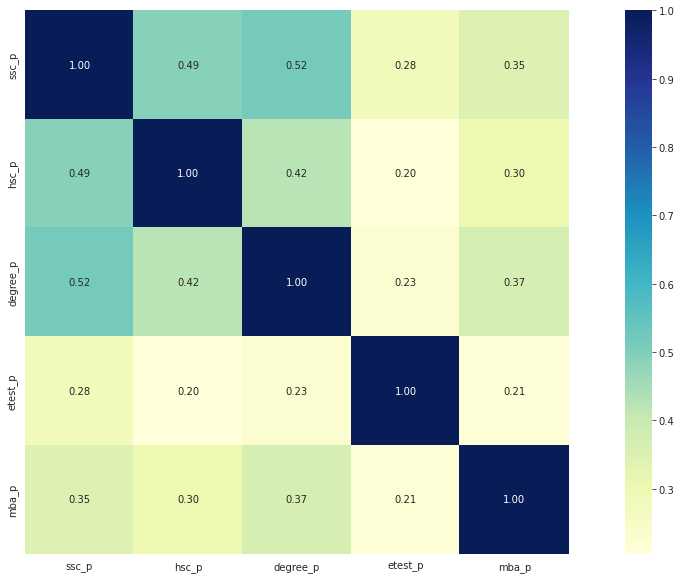

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(data[['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'etest_p','mba_p']].corr(), square = True, annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.show()

**จาก heatmap ด้านบน พบว่าค่า correlation มีค่าไม่เกิน 0.8 ซึ่งแสดงว่าตัวแปรแต่ละตัวนั้นไม่มีความสัมพันธ์ต่อกันมากเกินไป ดังนั้นจึงไม่มีการตัด Feature ออกก่อนที่จะนำไปเข้า model**

##Pre-processing

**ทำการเปลี่ยนค่าตัวแปรที่เป็น Categorical ให้เป็น Numerical data เพื่อใช้ในการสร้าง model และใช้ One-hot encoding สำหรับตัวแปรของ feature ที่มีตั้งแต่ 2 ตัวแปรขึ้นไป**

In [ ]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [ ]:
#Display categorical data
print(data['gender'].unique())
print(data['hsc_b'].unique())
print(data['hsc_s'].unique())
print(data['ssc_b'].unique())
print(data['degree_t'].unique())
print(data['specialisation'].unique())
print(data['workex'].unique())
print(data['status'].unique())


['M' 'F']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Others' 'Central']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']
['No' 'Yes']
['Placed' 'Not Placed']


แปลงข้อมูลที่เป็น Binnominal data ให้เป็นตัวเลข 0 และ 1 ก่อนทำการเข้า model

In [ ]:
#Manipulating with catagorical data
data['gender'].replace({'M': 1, 'F': 0}, inplace = True)
data['hsc_b'].replace({'Others': 1, 'Central': 0}, inplace = True)
data['specialisation'].replace({'Mkt&HR': 1, 'Mkt&Fin': 0}, inplace = True)
data['workex'].replace({'Yes': 1, 'No': 0}, inplace = True)
data['ssc_b'].replace({'Others': 1, 'Central': 0}, inplace = True)
data['status'].replace({'Placed': 1, 'Not Placed': 0}, inplace = True)

Feature `hsc_s` และ `degree_t` เนื่องจากข้อมูลมีมากกว่า 2 ตัวแปร และไม่ได้เป็นลักษณะเป็นข้อมูลที่แสดงลำดับหรือ Ordinal data ดังนั้น ใช้เทคนิค One hot encoding เพื่อแปลงข้อมูลเป็นตัวเลข

In [ ]:
#One hot endconding
onehot_column = pd.get_dummies(data[['hsc_s', 'degree_t']], prefix=['hsc_s', 'degree_t'])
data = pd.concat([data,onehot_column],axis=1)
data.drop(['hsc_s', 'degree_t'],axis=1,inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [ ]:
data.shape

(206, 17)

##**Machine Learning Model**

**ทำการแบ่งข้อมูล train set และ test set**

In [ ]:
#Import necessary model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**ทำการแบ่งข้อมูลเพื่อใช้ในการ Training และ Testing โดยกำหนดสัดส่วนให้ Training data = 70% และ Testing data = 30% ใช้ `random_state` = 10**

In [ ]:
X = data.drop(['status'], axis =1)
y = data['status']

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=10)

print(X_train.shape)
print(y_train.shape)

(144, 16)
(144,)


---

### Balancing data

**เนื่องจากใน project นี้จะใช้ทั้งหมด 4 โมเดล**
- Decision tree
- Random forrest
- XGBoost
- Logistic regression
  
  ซึ่งสำหรับ Logistic regression จะต้องทำการตรวจสอบข้อมูลว่ามีความ balance หรือไม่ ถ้าไม่ balance ให้ทำการ resampling ก่อนนำเข้าโมเดล

In [ ]:
data['status'].value_counts()

1    144
0     62
Name: status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


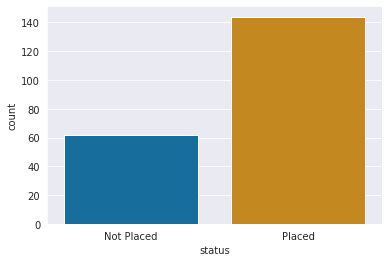

In [ ]:
g = sns.countplot(data['status'])
g.set_xticklabels(['Not Placed','Placed'])
plt.show()

**จากกราฟ bar chart จะเห็นว่าข้อมูลเป็น imbalance เนื่องจากมี status Placed สูงกว่า Not placed ค่อนข้างมาก จึงทำการ Resampling โดยใช้ Oversampling Minority Class**

In [ ]:
from sklearn.utils import resample
X2 = pd.concat([X_train, y_train], axis=1)
X2.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
45,0,76.0,0,64.0,0,72.0,0,58.0,1,66.53,0,0,1,0,0,1,0
81,1,81.7,1,63.0,1,67.0,1,86.0,0,70.20,0,0,1,1,0,0,1
148,0,77.0,0,86.0,0,56.0,0,57.0,0,64.08,1,0,0,0,1,0,1
21,0,79.0,1,76.0,1,85.0,0,95.0,0,69.06,0,1,0,1,0,0,1
132,1,67.0,1,68.0,1,64.0,1,74.4,1,53.49,0,1,0,1,0,0,1


In [ ]:
# separate minority and majority classes
not_placed = X2[X2.status==0]
placed = X2[X2.status==1]

# upsample minority
not_placed_upsampled = resample(not_placed,
                          replace=True, # sample with replacement
                          n_samples=len(placed), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([placed, not_placed_upsampled])

# check new class counts
upsampled.status.value_counts()

1    99
0    99
Name: status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


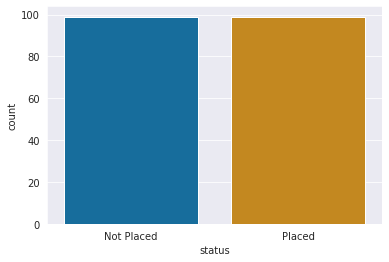

In [ ]:
g = sns.countplot(upsampled['status'])
g.set_xticklabels(['Not Placed','Placed'])
plt.show()

**หลังจากการทำ Resampling จะเห็นว่าข้อมูลเป็น balance data แล้ว**

In [ ]:
#sampled data for logistic regression model

X_train_sampled = upsampled.drop(['status'], axis =1)
y_train_sampled = upsampled['status']


---

###Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5, random_state = 10)
dt_clf = dt_clf.fit(X_train_sampled,y_train_sampled)
y_pred_dt = dt_clf.predict(X_test)


In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

Accuracy: 0.7419354838709677


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        17
           1       0.94      0.69      0.79        45

    accuracy                           0.74        62
   macro avg       0.73      0.79      0.72        62
weighted avg       0.82      0.74      0.76        62



Text(27.6, 0.5, 'predicted label')

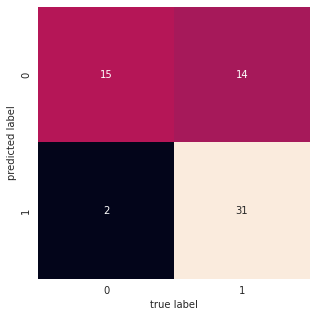

In [ ]:
mat_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 5))
sns.heatmap(mat_dt.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

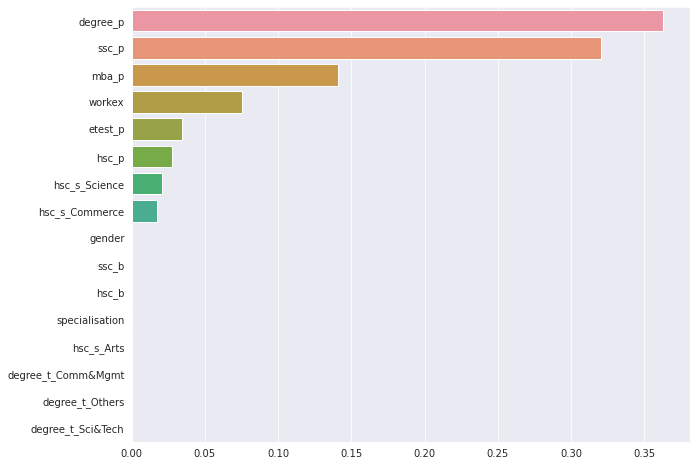

In [ ]:
plt.figure(figsize = (10,8))
dt_clf_importance = pd.Series(dt_clf.feature_importances_,index=X.columns)
dt_clf_importance = dt_clf_importance.sort_values(ascending = False)
sns.barplot(x=dt_clf_importance, y=dt_clf_importance.index)
plt.show()

###Random forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train_sampled,y_train_sampled)
y_pred_rf_clf = rf_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf_clf)

0.8870967741935484

In [ ]:
print(classification_report(y_test, y_pred_rf_clf))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.90      0.96      0.92        45

    accuracy                           0.89        62
   macro avg       0.88      0.83      0.85        62
weighted avg       0.89      0.89      0.88        62



Text(27.6, 0.5, 'predicted label')

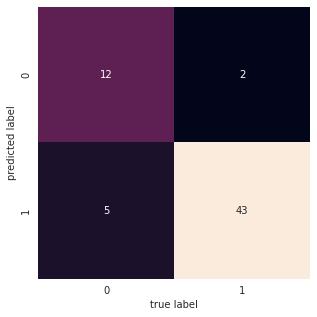

In [ ]:
mat = confusion_matrix(y_test, y_pred_rf_clf)
plt.figure(figsize=(5, 5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

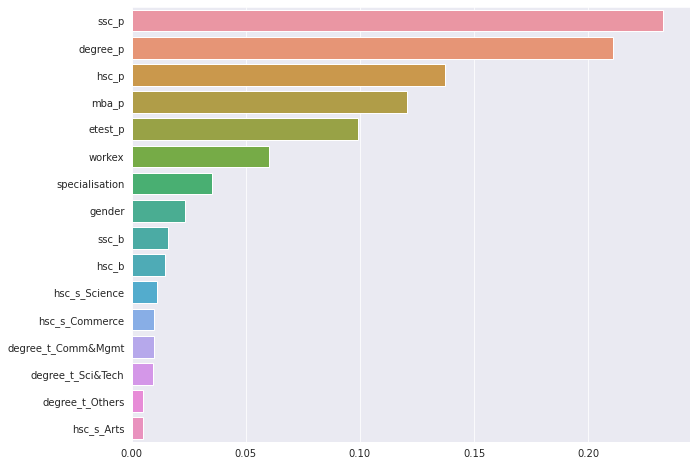

In [ ]:
#Randomforest Classifier Feature Importance
plt.figure(figsize = (10,8))
rf_clf_importance = pd.Series(rf_clf.feature_importances_,index=X.columns)
rf_clf_importance = rf_clf_importance.sort_values(ascending = False)
sns.barplot(x=rf_clf_importance, y=rf_clf_importance.index)
plt.show()

###XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train_sampled,y_train_sampled)

XGBClassifier()

In [ ]:
pred_xgb = xgb.predict(X_test)
accuracy_score(pred_xgb,y_test)

0.8870967741935484

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.93      0.91      0.92        45

    accuracy                           0.89        62
   macro avg       0.85      0.87      0.86        62
weighted avg       0.89      0.89      0.89        62



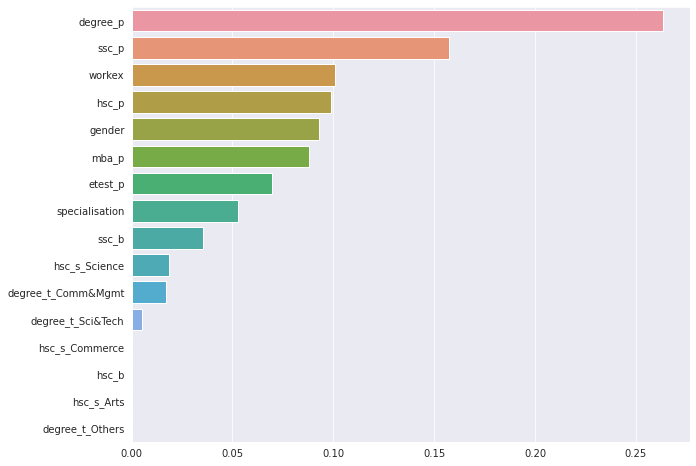

In [ ]:
plt.figure(figsize = (10,8))
feature_importance_xgb = pd.Series(xgb.feature_importances_,index=X.columns)
feature_importance_xgb = feature_importance_xgb.sort_values(ascending = False)
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index)
plt.show()

###Logistic Regression

In [ ]:
clf_lr = LogisticRegression(solver = 'liblinear', max_iter=1000)
trained_model = clf_lr.fit(X_train_sampled, y_train_sampled)
lr_y_pred = trained_model.predict(X_test)

In [ ]:
accuracy_score(y_test, lr_y_pred)

0.8064516129032258

In [ ]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.59      0.94      0.73        17
           1       0.97      0.76      0.85        45

    accuracy                           0.81        62
   macro avg       0.78      0.85      0.79        62
weighted avg       0.87      0.81      0.82        62



Text(27.6, 0.5, 'predicted label')

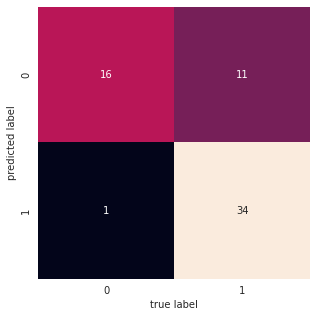

In [ ]:
mat_lr = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(mat_lr.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
y_predicted = trained_model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc = roc_auc_score(y_test, y_predicted)
print('ROC AUC : ',roc_auc)

ROC AUC :  0.8483660130718954


In [ ]:
clf_lr.coef_


array([[-0.13563518,  0.17100989,  0.46063508,  0.0874443 ,  0.06391274,
         0.06681815,  1.67175741, -0.00511865, -0.8901828 , -0.31099317,
         0.14334158, -1.01955662, -0.11579988,  0.0837349 , -0.33550696,
        -0.74024286]])

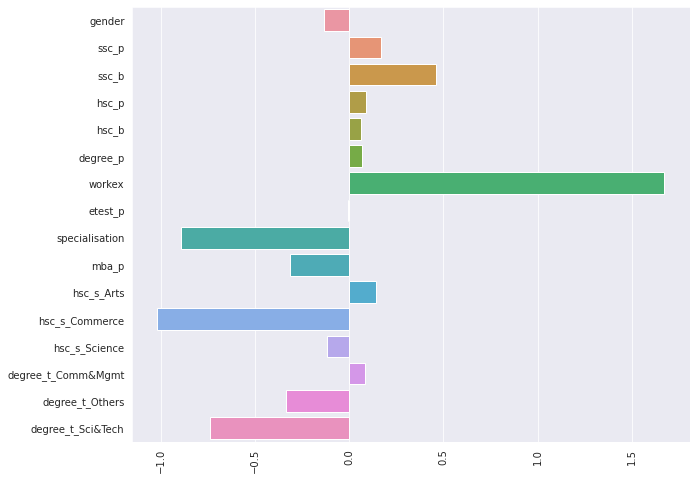

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = clf_lr.coef_[0], y = X_train.columns)
plt.xticks(rotation=90)
plt.show()

##**Assignment Objective**

###Best Perfomance Model



*   Model ที่มีความแม่นยำมากที่สุดคือ Random Forest ซึ่งได้ค่า Accuracy ที่ 88% มีค่า Precision และ Recall รวมถึง F1 Score มากที่สุด






###ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน 3 อันดับแรก



1.   `ssc_p` Secondary Education percentage- 10th Grade
2.   `degree_p` Degree Percentage
3. `hsc_p` Higher Secondary Education percentage- 12th Grade




จากการทำ Feature Importance ของ model Random Forest เราสามารถสรุปได้ว่า เกรดเฉลี่ยในระดับมัธยมและมหาวิทยาลัยมีผลต่อการรับเข้าทำงานมากที่สุด